# **DATA UNDERSTANDING**

## **Context** 

Sebuah perusahaan bergerak dibidang export/import bahan-bahan makanan dan minuman ingin mengetahui gambaran umum tentang bisnis yang mereka jalankan. Terdapat sebuah database yang menunjukkan detail dari proses transaksi. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk memperoleh keuntungan yang lebih dari saat ini.

## **Database Information**

Sumber database: https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Database yang dimiliki mempunyai 13 tabel, yaitu:
- Region               : Berisi informasi tentang pemetaan daerah distribusi perusahaan
- Territories          : Berisi informasi tentang kota area distribusi 
- EmployeeTerritories  : Berisi informasi lokasi karyawan perusahaan ditempatkan
- Employees            : Berisi informasi karyawan perusahaan (gaji, lokasi, jabatan, dll)
- Shippers             : Berisi informasi tentang perusahaan pengiriman serta nomor yang bisa dihubungi
- Orders               : Berisi informasi penjualan perusahaan
- Customers            : Berisi informasi terkait data-data pelanggan 
- OrderDetails         : Berisi informasi list barang yang dipesan dari setiap orderID
- Products             : Berisi informasi produk yang dijual oleh perusahaan
- CustomerDemographics : Tidak ada informasi dalam table
- CustomerCustomerDemo : Tidak ada informasi dalam table
- Suppliers            : Berisi informasi terkait data-data supplier perusahaan
- Categories           : Berisi informasi kategori produk perusahaan

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

#  **DATABASE**

# **Connecting to Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [1]:
# import modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [2]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '12345',
    database = 'northwind'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [3]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## **ERD dari Database Northwind**

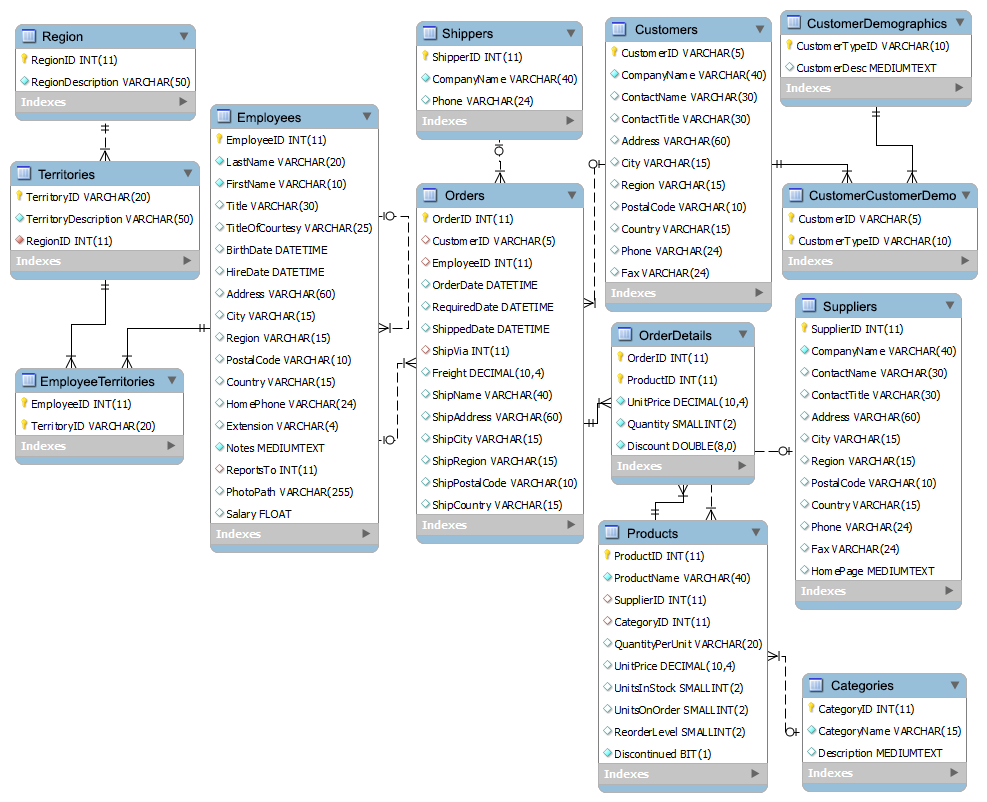

## **Data Detail & Keuntungan Transaksi**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 5 tabel, yaitu tabel ```OrderDetails```, ```Products```, ```Orders```, ```Customers```, dan ```Categories```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :
- orderID dari tabel OrderDetails
- productID dari tabel OrderDetails
- unitprice dari tabel OrderDetails
- quantity dari tabel OrderDetails
- discount dari tabel OrderDetails
- productid dari tabel Products
- productname dari tabel Products
- categoryID dari tabel Products
- categoryname dari tabel Categories
- orderdate dari tabel Orders
- requireddate dari tabel Orders
- shippeddate dari tabel Orders
- customerId dari tabel Customers
- companyname dari tabel Customers
- contactname dari tabel Customers
- contacttitle dari tabel Customers
- city dari tabel Customers
- region dari tabel Customers
- country dari tabel Customers

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [4]:
#Query 1

table1 = sql_table (
    '''
select a.orderID, a.productID, a.unitprice, a.quantity, a.discount,
		b.productid, b.productname, b.categoryID, e.categoryname,
		c.orderdate, c.requireddate, c.shippeddate, 
		d.customerId, d.companyname, d.contactname, d.contacttitle, d.city, d.region, d.country
from orderdetails a left join products b on a.productid=b.productid 
left join orders c on a.orderid=c.orderid
left join customers d on d.customerid=c.customerid
left join categories e on b.categoryid=e.categoryid;
    '''
)
table1.head()

,orderID,productID,unitprice,quantity,discount,productid,productname,categoryID,categoryname,orderdate,requireddate,shippeddate,customerId,companyname,contactname,contacttitle,city,region,country
0,10248,11,14.0000,12,0.0,11,Queso Cabrales,4,Dairy Products,1996-07-04,1996-08-01,1996-07-16,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,None,France
1,10248,42,9.8000,10,0.0,42,Singaporean Hokkien Fried Mee,5,Grains/Cereals,1996-07-04,1996-08-01,1996-07-16,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,None,France
2,10248,72,34.8000,5,0.0,72,Mozzarella di Giovanni,4,Dairy Products,1996-07-04,1996-08-01,1996-07-16,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,None,France
3,10249,14,18.6000,9,0.0,14,Tofu,7,Produce,1996-07-05,1996-08-16,1996-07-10,TOMSP,Toms Spezialitten,Karin Josephs,Marketing Manager,Mnster,None,Germany
4,10249,51,42.4000,40,0.0,51,Manjimup Dried Apples,7,Produce,1996-07-05,1996-08-16,1996-07-10,TOMSP,Toms Spezialitten,Karin Josephs,Marketing Manager,Mnster,None,Germany


## **Data Total Orderan per Customer dan Negara Asalnya**

In [5]:
#Query 2

table2 = sql_table (
    '''
select b.country, b.companyname, count(a.orderID) as totalOrder 
from orders a left join customers b 
on a.customerID=b.customerID 
group by companyname order by country asc;
    '''
)
table2

,country,companyname,totalOrder
0,Argentina,Cactus Comidas para llevar,6
1,Argentina,Rancho grande,5
2,Argentina,Ocano Atlntico Ltda.,5
3,Austria,Piccolo und mehr,10
4,Austria,Ernst Handel,30
...,...,...,...
84,USA,Great Lakes Food Market,11
85,Venezuela,LINO-Delicateses,12
86,Venezuela,HILARION-Abastos,18
87,Venezuela,GROSELLA-Restaurante,2


Data kedua ini merupakan informasi yang bisa menjadi data tambahan untuk melihat gambaran tentang data yang dimiliki. Data ini memuat List customer kita, negara asal mereka serta seberapa sering mereka melakukan pesanan.

# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **Data Anomalies**

In [6]:
# check info table1

table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   orderID       2155 non-null   int64         
 1   productID     2155 non-null   int64         
 2   unitprice     2155 non-null   object        
 3   quantity      2155 non-null   int64         
 4   discount      2155 non-null   float64       
 5   productid     2155 non-null   int64         
 6   productname   2155 non-null   object        
 7   categoryID    2155 non-null   int64         
 8   categoryname  2155 non-null   object        
 9   orderdate     2155 non-null   datetime64[ns]
 10  requireddate  2155 non-null   datetime64[ns]
 11  shippeddate   2082 non-null   datetime64[ns]
 12  customerId    2155 non-null   object        
 13  companyname   2155 non-null   object        
 14  contactname   2155 non-null   object        
 15  contacttitle  2155 non-null   object  

## **Melihat Data Sekilas Dari General Info**

   Mari sejenak melihat apa yang ditampilkan pada general info yang disajikan di atas. Terlihat bahwa secara keseluruhan terdapat 2155 baris data dengan total 18 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, float, dan datetime. Oke, mari sejenak mengesampingkan tipe data. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, tidak semua kolom atau feature yang memiliki data lengkap. Yang paling terlihat jomplang adalah pada ```region```. features pada kolom tersebut kehilangan lebih dari 50% data. Selain dari itu, ada beberapa feature yang datanya juga missing, yang nantinya akan ditampilkan pada bagian berikutnya. **Kesimpulan pertama adalah bahwa terdapat *missing value* yang harus ditanggulangi.**

   Selain itu, jika kita melihat dari sisi tipe data, ada tipe data yang belum cocok dengan featurenya yaitu ```unitprice```. Oleh karena itu, feature dari data tersebut harus diditanggulangi dengan merubah tipe datanya. **kesimpulan keduanya adalah terdapat features yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya**

In [7]:
table1.isnull().sum()

orderID            0
productID          0
unitprice          0
quantity           0
discount           0
productid          0
productname        0
categoryID         0
categoryname       0
orderdate          0
requireddate       0
shippeddate       73
customerId         0
companyname        0
contactname        0
contacttitle       0
city               0
region          1329
country            0
dtype: int64

## **Missing Values**

Telah dijelaskan sebelumnya, terdapat 2 feature yang memang memiliki missing values. Yang paling jadi sorotan adalah region yang memiliki total missing value yang lebih dari 50%. Artinya, jika missing valuenya dihilangkan dengan melihat row atau barisnya, setengah dari data yang dimiliki akan hilang, yang berarti akan mengakibatkan hilangnya banyak informasi. Tentu saja hal tersebut tidak dibenarkan. Untuk mengatasi hal tersebut, maka feature tersebut akan dihapus dan tidak akan dimasukkan ke dalam data yang akan dianalisis.

In [8]:
# Remove Missing Value

table1.drop(["region"],axis=1,inplace=True)

In [9]:
# Recheck Info

table1.isnull().sum()

orderID          0
productID        0
unitprice        0
quantity         0
discount         0
productid        0
productname      0
categoryID       0
categoryname     0
orderdate        0
requireddate     0
shippeddate     73
customerId       0
companyname      0
contactname      0
contacttitle     0
city             0
country          0
dtype: int64

## **Recheck Missing Value Information**

Setelah dilakukan pengecekan terhadap table baru, dapat disimpulkan bahwa kolom ```region``` sudah dihapus.

In [10]:
table1[table1.duplicated()]

,orderID,productID,unitprice,quantity,discount,productid,productname,categoryID,categoryname,orderdate,requireddate,shippeddate,customerId,companyname,contactname,contacttitle,city,country


## **Mengubah Tipe Data Yang Salah**

Oke, telah disebutkan juga sebelumnya bahwa ada tipe data yang tidak sesuai yaitu ```unitprice```. Oleh karena itu akan kita ubah tipe datanya menjadi numerik.

In [11]:
# Change Spesific Column To Date Time Format

table1['unitprice'] = pd.to_numeric(table1['unitprice'])

In [12]:
# Recheck Info

table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   orderID       2155 non-null   int64         
 1   productID     2155 non-null   int64         
 2   unitprice     2155 non-null   float64       
 3   quantity      2155 non-null   int64         
 4   discount      2155 non-null   float64       
 5   productid     2155 non-null   int64         
 6   productname   2155 non-null   object        
 7   categoryID    2155 non-null   int64         
 8   categoryname  2155 non-null   object        
 9   orderdate     2155 non-null   datetime64[ns]
 10  requireddate  2155 non-null   datetime64[ns]
 11  shippeddate   2082 non-null   datetime64[ns]
 12  customerId    2155 non-null   object        
 13  companyname   2155 non-null   object        
 14  contactname   2155 non-null   object        
 15  contacttitle  2155 non-null   object  

## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## **Feature 'Processing Day'**

Data awal menunjukan terdapat 2 features yang merupakan tipe data datetime. Artinya, kita dapat melakukan ekstraksi informasi tambahan dari kedua features tersebut. Sebelumnya, kita perlu tahu dulu definisi dari kedua tabel tersebut. requiredDate secara singkat dapat diartikan sebagai waktu atau kapan barang tersebut dibutuhkan, sedangkat shippedDate adalah waktu dikirimkannya barang tersebut. 

Melihat kedua definisi tersebut, sebuah informasi dapat diambil, yakni seberapa lama waktu proses barangnya dari waktu pengiriman hingga dibutuhkan. Oleh karena itu, untuk mendapatkan informasinya, maka perlu dilakukan pengurangan antara requiredDate dan juga shippedDate. Mungkin akan timbul pertanyaan, apakah waktu dapat dikurangkan? Jawabannya, bisa. Output yang keluar nantinya akan berupa selisih atau lamanya waktu proses tersebut dalam satuan hari.

In [13]:
#add new column (Processing Date)

table1["processingDate"]=table1["requireddate"]-table1["shippeddate"]
table1.head()

,orderID,productID,unitprice,quantity,discount,productid,productname,categoryID,categoryname,orderdate,requireddate,shippeddate,customerId,companyname,contactname,contacttitle,city,country,processingDate
0,10248,11,14.0,12,0.0,11,Queso Cabrales,4,Dairy Products,1996-07-04,1996-08-01,1996-07-16,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,16 days
1,10248,42,9.8,10,0.0,42,Singaporean Hokkien Fried Mee,5,Grains/Cereals,1996-07-04,1996-08-01,1996-07-16,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,16 days
2,10248,72,34.8,5,0.0,72,Mozzarella di Giovanni,4,Dairy Products,1996-07-04,1996-08-01,1996-07-16,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,16 days
3,10249,14,18.6,9,0.0,14,Tofu,7,Produce,1996-07-05,1996-08-16,1996-07-10,TOMSP,Toms Spezialitten,Karin Josephs,Marketing Manager,Mnster,Germany,37 days
4,10249,51,42.4,40,0.0,51,Manjimup Dried Apples,7,Produce,1996-07-05,1996-08-16,1996-07-10,TOMSP,Toms Spezialitten,Karin Josephs,Marketing Manager,Mnster,Germany,37 days


## **Unique Value 'ProcessingDate'**

Oke, setelah membuat sebuah kolom baru yang bernama ProcessingDate sebagaimana yang sudah didefinisikan sebelumnya, mari kita cek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada keanehan. Lantas bagaimana jika kita melihat lebih dalam ke dalam feature baru ini? Berikut ini penampakan hasil yang memperlihatkan unique values beserta jumlah data di setiap unique values-nya.

In [14]:
table1["processingDate"].value_counts().sort_index(ascending=False)

41 days       3
39 days      16
38 days       3
37 days       5
36 days      31
35 days      23
34 days      23
33 days       6
32 days      15
30 days       6
28 days       2
27 days      35
26 days     145
25 days     160
24 days     158
23 days     165
22 days     191
21 days     227
20 days     139
19 days     159
18 days      98
17 days      34
16 days      39
15 days      15
14 days       8
13 days      18
12 days       5
11 days      22
10 days      37
9 days       24
8 days       30
7 days       37
6 days       21
5 days       31
4 days       27
3 days       11
2 days        5
1 days        6
0 days       10
-1 days      20
-2 days       6
-3 days       2
-4 days       8
-5 days       6
-6 days      15
-7 days      16
-8 days       2
-9 days       4
-11 days      2
-16 days      5
-17 days      1
-18 days      4
-23 days      1
Name: processingDate, dtype: int64

## **Anomali Pada Processing Date**

Melihat output unique values beserta dengan banyaknya data di setiap unique values tersebut, apakah terlihat sesuatu yang aneh? Yap benar, terdapat 92 data yang menunjukan nilai minus. Ada 2 asumsi yang bisa diambil. Asumsi pertama adalah murni kesalahan input saat memasukan ke dalam database, atau asumsi yang kedua adalah pengirimannya mengalami keterlambatan. 

Untuk asumsi yang pertama, cara mengatasinya cukup dengan drop 18 data yang salah input. Dengan kata lain, kita menganggap bahwa data tersebut 'salah' dan dapat dibuang (karena jumlahnya yang tidak banyak). Untuk asumsi kedua, data ini bisa saja dipertahankan dan bisa dilakukan analisis lebih lanjut untuk mengetahui letak permasalahannya.

Di sini, asumsi yang akan digunakan adalah asumsi yang kedua, yaitu kita akan mengasumsikan terdapat keterlambatan dalam pengiriman. Nantinya, kita akan coba melakukan analisis untuk data ini.

In [15]:
# Handling Date Time Format Anomalies (Check Data First)

table1[table1["processingDate"]<"0 days"]

,orderID,productID,unitprice,quantity,discount,productid,productname,categoryID,categoryname,orderdate,requireddate,shippeddate,customerId,companyname,contactname,contacttitle,city,country,processingDate
47,10264,2,15.20,35,0.0,2,Chang,1,Beverages,1996-07-24,1996-08-21,1996-08-23,FOLKO,Folk och f HB,Maria Larsson,Owner,Brcke,Sweden,-2 days
48,10264,41,7.70,25,0.0,41,Jack's New England Clam Chowder,8,Seafood,1996-07-24,1996-08-21,1996-08-23,FOLKO,Folk och f HB,Maria Larsson,Owner,Brcke,Sweden,-2 days
61,10271,33,2.00,24,0.0,33,Geitost,4,Dairy Products,1996-08-01,1996-08-29,1996-08-30,SPLIR,Split Rail Beer & Ale,Art Braunschweiger,Sales Manager,Lander,USA,-1 days
83,10280,24,3.60,12,0.0,24,Guaran Fantstica,1,Beverages,1996-08-14,1996-09-11,1996-09-12,BERGS,Berglunds snabbkp,Christina Berglund,Order Administrator,Lule,Sweden,-1 days
84,10280,55,19.20,20,0.0,55,Pt chinois,6,Meat/Poultry,1996-08-14,1996-09-11,1996-09-12,BERGS,Berglunds snabbkp,Christina Berglund,Order Administrator,Lule,Sweden,-1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,10927,52,7.00,5,0.0,52,Filo Mix,5,Grains/Cereals,1998-03-05,1998-04-02,1998-04-08,LACOR,La corne d'abondance,Daniel Tonini,Sales Representative,Versailles,France,-6 days
1764,10927,76,18.00,20,0.0,76,Lakkalikri,1,Beverages,1998-03-05,1998-04-02,1998-04-08,LACOR,La corne d'abondance,Daniel Tonini,Sales Representative,Versailles,France,-6 days
1844,10960,24,4.50,10,0.0,24,Guaran Fantstica,1,Beverages,1998-03-19,1998-04-02,1998-04-08,HILAA,HILARION-Abastos,Carlos Hernndez,Sales Representative,San Cristbal,Venezuela,-6 days
1845,10960,41,9.65,24,0.0,41,Jack's New England Clam Chowder,8,Seafood,1998-03-19,1998-04-02,1998-04-08,HILAA,HILARION-Abastos,Carlos Hernndez,Sales Representative,San Cristbal,Venezuela,-6 days


## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [16]:
# Clean Data

table1.sample(20)

,orderID,productID,unitprice,quantity,discount,productid,productname,categoryID,categoryname,orderdate,requireddate,shippeddate,customerId,companyname,contactname,contacttitle,city,country,processingDate
723,10522,1,18.00,40,0.0,1,Chai,1,Beverages,1997-04-30,1997-05-28,1997-05-06,LEHMS,Lehmanns Marktstand,Renate Messner,Sales Representative,Frankfurt a.M.,Germany,22 days
1910,10987,72,34.80,20,0.0,72,Mozzarella di Giovanni,4,Dairy Products,1998-03-31,1998-04-28,1998-04-06,EASTC,Eastern Connection,Ann Devon,Sales Agent,London,UK,22 days
1484,10816,62,49.30,20,0.0,62,Tarte au sucre,3,Confections,1998-01-06,1998-02-03,1998-02-04,GREAL,Great Lakes Food Market,Howard Snyder,Marketing Manager,Eugene,USA,-1 days
1562,10845,35,18.00,25,0.0,35,Steeleye Stout,1,Beverages,1998-01-21,1998-02-04,1998-01-30,QUICK,QUICK-Stop,Horst Kloss,Accounting Manager,Cunewalde,Germany,5 days
185,10318,41,7.70,20,0.0,41,Jack's New England Clam Chowder,8,Seafood,1996-10-01,1996-10-29,1996-10-04,ISLAT,Island Trading,Helen Bennett,Marketing Manager,Cowes,UK,25 days
777,10539,21,10.00,15,0.0,21,Sir Rodney's Scones,3,Confections,1997-05-16,1997-06-13,1997-05-23,BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,London,UK,21 days
179,10314,62,39.40,25,0.0,62,Tarte au sucre,3,Confections,1996-09-25,1996-10-23,1996-10-04,RATTC,Rattlesnake Canyon Grocery,Paula Wilson,Assistant Sales Representative,Albuquerque,USA,19 days
1086,10660,20,81.00,21,0.0,20,Sir Rodney's Marmalade,3,Confections,1997-09-08,1997-10-06,1997-10-15,HUNGC,Hungry Coyote Import Store,Yoshi Latimer,Sales Representative,Elgin,USA,-9 days
1633,10870,35,18.00,3,0.0,35,Steeleye Stout,1,Beverages,1998-02-04,1998-03-04,1998-02-13,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,Warszawa,Poland,19 days
946,10606,62,49.30,10,0.0,62,Tarte au sucre,3,Confections,1997-07-22,1997-08-19,1997-07-31,TRADH,Tradio Hipermercados,Anabela Domingues,Sales Representative,Sao Paulo,Brazil,19 days


## **General Info Cleaned Data**

In [17]:
# Check Some Info

listItem = []
for col in table1.columns :
    listItem.append([col, table1[col].dtype, len(table1),table1[col].isna().sum(), round((table1[col].isna().sum()/len(table1[col])) * 100,2),
                    table1[col].nunique()])
    
table1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique'],
                     data=listItem)
table1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique
0,orderID,int64,2155,0,0.00,830
1,productID,int64,2155,0,0.00,77
2,unitprice,float64,2155,0,0.00,116
3,quantity,int64,2155,0,0.00,55
4,discount,float64,2155,0,0.00,1
5,productid,int64,2155,0,0.00,77
6,productname,object,2155,0,0.00,77
7,categoryID,int64,2155,0,0.00,8
8,categoryname,object,2155,0,0.00,8
9,orderdate,datetime64[ns],2155,0,0.00,480


## **Analisis terhadap "Country"**

In [18]:
# Groupping and Aggregating

country=table1[["orderID","country"]].groupby("country").describe()
country.columns=country.columns.droplevel()
country.sort_values(by=["count"],ascending=False)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
USA,352.0,10695.636364,244.626196,10262.0,10508.50,10696.0,10884.00,11077.0
Germany,328.0,10631.097561,235.626310,10249.0,10446.00,10618.5,10827.00,11070.0
Brazil,203.0,10651.694581,236.334792,10250.0,10422.00,10652.0,10839.00,11068.0
France,184.0,10635.581522,230.288329,10248.0,10436.00,10634.0,10832.00,11076.0
UK,135.0,10660.103704,229.368935,10289.0,10471.50,10621.0,10838.50,11057.0
Austria,125.0,10658.712000,248.076140,10258.0,10427.00,10667.0,10854.00,11072.0
Venezuela,118.0,10682.847458,251.444226,10257.0,10485.00,10701.0,10901.00,11071.0
Sweden,97.0,10669.453608,232.794483,10264.0,10460.00,10703.0,10866.00,11050.0
Canada,75.0,10628.920000,230.217627,10332.0,10427.50,10590.0,10810.00,11048.0


Dari sini kita tahu bahwa Order paling sering dilakukan dari negara USA, Germany, Brazil, France, UK, Austria, dan Venezuela karena telah melakukan lebih dari 100 Order.

Dari informasi tersebut, kita bisa mengambil insight bahwa:
1. Kita mungkin bisa fokus mendistribusikan barang" di daerah yang banyak terjadi transaksi
1. Perusahaan mungkin belum maksimal dalam memasarkan produk di daerah yang sedikit adanya orderan

Saran dari saya sebagai seorang analis adalah:
1. Mengimplementasikan Customer Driven Marketing Strategy, dengan tujuan customer kita untuk tetap loyal terhadap perusahaan.
1. Melakukan analisis pasar untuk daerah yang ordernya belum maksimal, kemudian menyusun strategi meningkatkan penjualan di daerah tersebut.

# **DATA VISUALIZATION & STATISTICS**

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk mendapatkan profit yang sebesar-besarnya dengan kerugian yang minim.

In [19]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## **Top 5 Sales per Customer**

In [20]:
#creating sales table

table1["sales"]=table1["unitprice"]*table1["quantity"]
table1.head()

,orderID,productID,unitprice,quantity,discount,productid,productname,categoryID,categoryname,orderdate,requireddate,shippeddate,customerId,companyname,contactname,contacttitle,city,country,processingDate,sales
0,10248,11,14.0,12,0.0,11,Queso Cabrales,4,Dairy Products,1996-07-04,1996-08-01,1996-07-16,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,16 days,168.0
1,10248,42,9.8,10,0.0,42,Singaporean Hokkien Fried Mee,5,Grains/Cereals,1996-07-04,1996-08-01,1996-07-16,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,16 days,98.0
2,10248,72,34.8,5,0.0,72,Mozzarella di Giovanni,4,Dairy Products,1996-07-04,1996-08-01,1996-07-16,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,16 days,174.0
3,10249,14,18.6,9,0.0,14,Tofu,7,Produce,1996-07-05,1996-08-16,1996-07-10,TOMSP,Toms Spezialitten,Karin Josephs,Marketing Manager,Mnster,Germany,37 days,167.4
4,10249,51,42.4,40,0.0,51,Manjimup Dried Apples,7,Produce,1996-07-05,1996-08-16,1996-07-10,TOMSP,Toms Spezialitten,Karin Josephs,Marketing Manager,Mnster,Germany,37 days,1696.0


In [21]:
#set up table

top5customer=table1[["companyname","sales"]].groupby("companyname").sum().sort_values(by=["sales"],ascending=False)
top5customer["companyname"]=top5customer.index
top5customer

,sales,companyname
companyname,,
QUICK-Stop,117483.39,QUICK-Stop
Save-a-lot Markets,115673.39,Save-a-lot Markets
Ernst Handel,113236.68,Ernst Handel
Hungry Owl All-Night Grocers,57317.39,Hungry Owl All-Night Grocers
Rattlesnake Canyon Grocery,52245.90,Rattlesnake Canyon Grocery
...,...,...
Galera del gastrnomo,836.70,Galera del gastrnomo
North/South,649.00,North/South
Laughing Bacchus Wine Cellars,522.50,Laughing Bacchus Wine Cellars


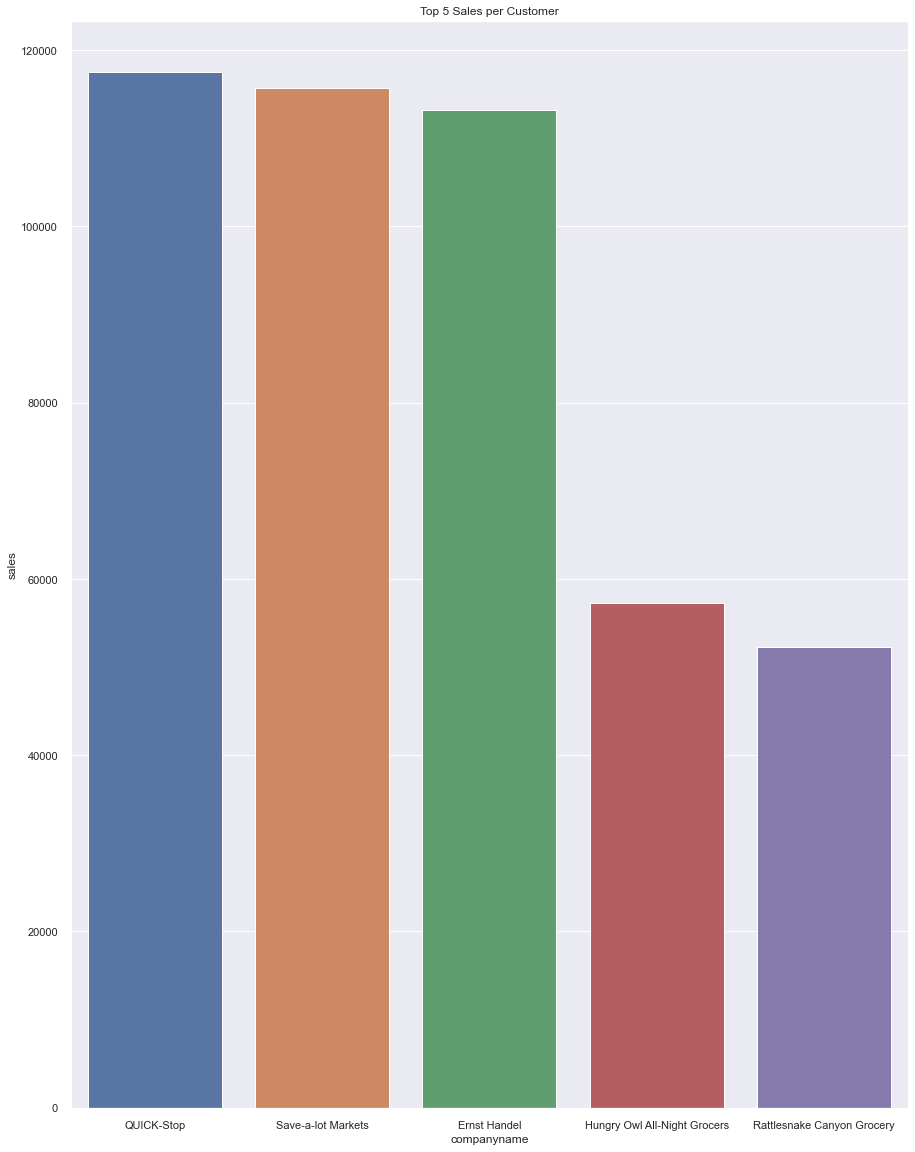

In [30]:
#creating plot

fig1=sns.barplot(x="companyname",y="sales",data=top5customer.head()).set(title="Top 5 Sales per Customer")
sns.set(rc={'figure.figsize':(15,20)})

Dengan kita mengetahui top 5 customer kita adalah Quick-Stop, Save-a-lot Markets, Erns Handel, Hungry Owl All-Night Crocers, dan Rattlesnake Canyon Grocery.

Kita dapat mengambil beberapa pendekatan yaitu:
1. Menawarkan produk baru dan memberikan special service atas kontribusi mereka selama ini
1. Meminta feedback mereka atas service kita selama ini
1. Untuk customer di luar ini, mungkin bisa dicek lebih rinci ke bagian marketing/penjualan alasan customer tersebut belum memesan barang

## **Persentase Sales berdasarkan Negara**

In [23]:
# Creating Table

negara=table1[["country","sales"]].groupby("country").sum().sort_values(by=["sales"],ascending=False)
negara.head()

,sales
country,
USA,263566.98
Germany,244640.63
Austria,139496.63
Brazil,114968.48
France,85498.76


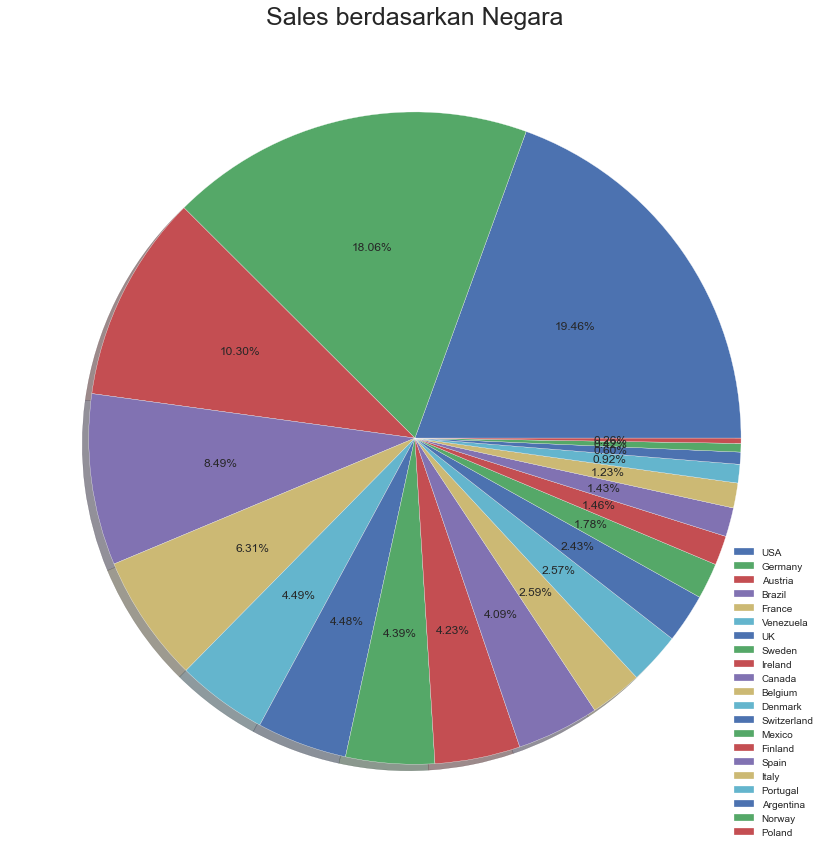

In [24]:
# Pie Chart Status

plt.style.use('seaborn')
plt.figure(figsize=(20,15))
plt.pie(negara["sales"],autopct='%.2f%%',shadow=True)
plt.title ('Sales berdasarkan Negara', size = 25)
plt.legend(negara.index)
plt.show()

Dari sini dapat disimpulkan bahwa 56% sales berpusat pada USA, Germany, Austria, dan Brazil. 17 Negara lainnya berkontribusi sebesar 44%.

Hal yang dapat disimpulkan bahwa:
1. Kita bisa mencoba menawarkan produk-produk baru ke perusahaan yang berada di top 5 country 
1. Perusahaan bisa menyusun strategi untuk memasarkan produk baru berdasarkan negaranya. Contohnya di amerika sedang musim salju, mungkin bisa menjual produk seperti kopi instan.
1. Pada negara yang belum berkontribusi banyak mungkin akan dilakukan analisis lebih lanjut terkait pasar yang kita kuasai

## **Perbedaan Sales Top 5 Customer** 

In [25]:
# Uji Perbandingan Nilai Sales Antar Setiap Customer (Normalitas)

from scipy.stats import shapiro

norm, pval = shapiro(table1["sales"])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


In [26]:
# Top 5 Customer

table1[["companyname","sales"]].groupby("companyname").sum().sort_values(by=["sales"],ascending=False).head()

,sales
companyname,
QUICK-Stop,117483.39
Save-a-lot Markets,115673.39
Ernst Handel,113236.68
Hungry Owl All-Night Grocers,57317.39
Rattlesnake Canyon Grocery,52245.90


In [27]:
# Uji Perbandingan Nilai Sales Antar Top 5 Customer (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    table1[table1['companyname'] == 'QUICK-Stop']['sales'],
    table1[table1['companyname'] == 'Save-a-lot Markets']['sales'],
    table1[table1['companyname'] == 'Ernst Handel']['sales'],
    table1[table1['companyname'] == 'Hungry Owl All-Night Grocers']['sales'],
    table1[table1['companyname'] == 'Rattlesnake Canyon Grocery']['sales']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Sales pada Top 5 Customer')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Sales pada Top 5 Customer')

Tolak H0 Karena P-Value (0.0 < 5%)
Terdapat Perbedaan Nilai Median Sales pada Top 5 Customer


## **Hubungan antara Quantity, Unit Price, dan Sales**

<AxesSubplot:>

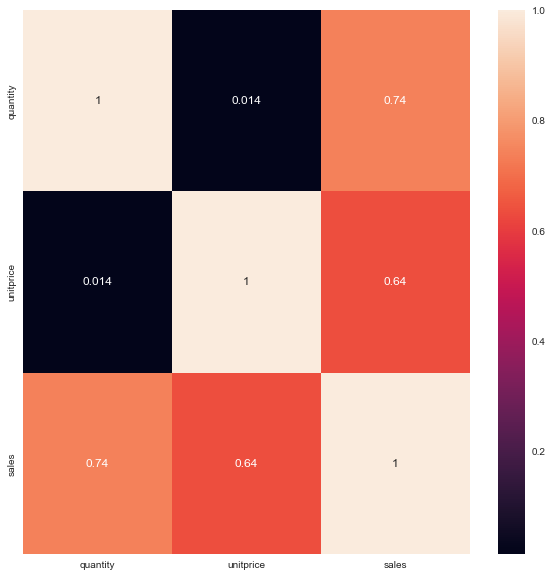

In [28]:
# Korelasi

plt.figure(figsize=(10,10))
sns.heatmap(table1[['quantity','unitprice', 'sales']].corr('spearman'), annot=True)

Dari tabel berikut dapat kita simpulkan bahwa:
1. Quantity dan sales memiliki hubungan linear yang kuat
1. Unit price dan Quantity hampir tidak memiliki hubungan
1. Unit price dan Sales memiliki hubungan linear yang lumayan kuat